In [0]:
import numpy as np
import pandas as pd
import os
from random import randint, getrandbits
import matplotlib.pyplot as plt

In [0]:
np.random.seed(42)

In [0]:
from keras.models import Sequential
from keras.layers import TimeDistributed, Dense
from keras.layers import LSTM, Conv2D, MaxPooling2D, BatchNormalization, CuDNNLSTM
from keras.layers import Dropout, Flatten, TimeDistributed, ConvLSTM2D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import backend as K 


Using TensorFlow backend.


In [0]:
from PIL import Image, ImageDraw, ImageFilter

In [0]:
import json

In [0]:
def create_pos_neg_images(lines, widths, reverse_colors=False, middle_stripe=False, different_widths=False, blur=False, implied_lines=False):

  color0 = (0, 0, 0)
  color1 = (255, 255, 255)
  
  if reverse_colors:
    color0 = (255, 255, 255)
    color1 = (0, 0, 0)
  
  img = Image.new('RGB', (95, 95), color = color0)
  img2 = Image.new('RGB', (95, 95), color = color0)
  draw = ImageDraw.Draw(img) 
  draw2 = ImageDraw.Draw(img2)
  
  if middle_stripe or implied_lines:
    lines = 1

  for line in range(0,lines):
    if different_widths:
      widths = randint(1,7)
    
    lin_len = 0
    lin_len2 = 0

    if implied_lines:
      if bool(getrandbits(1)):
        ran = randint(0, 50)
      else:
        ran = randint(120, 155)
    else:
      ran = randint(20,170)
  
    # "negative"
    if ran <= 95:
      coords = (ran-10,-10, 95, 95-ran)
    else:
      coords = (-10, ran-95 -10, 95 - (ran-95), 95)
    if implied_lines:
      implied_circles_creation(coords, draw, color1)
    else:  
      draw.line(coords, fill=color1, width=widths)
    lin_len = int(np.sqrt((coords[0] - coords[2])**2 + (coords[1] - coords[3])**2 ) - 45)

    # "positive"
    if ran <= 95:
      coords2 = (ran-10, 105, 105, ran-10)
    else:
      coords2 = (-10, 10+ran-95, 10+ran-95, -10)
    if implied_lines:
      implied_circles_creation(coords2, draw2, color1)
    else:
      draw2.line(coords2, fill=color1, width=widths)
    lin_len2 = int(np.sqrt((coords2[0] - coords2[2])**2 + (coords2[1] - coords2[3])**2 ) - 45)
      
  if middle_stripe:
    w1 = None
    w2 = None
    if lin_len > 0:
      w1 = randint(1, lin_len)
    if lin_len2 > 0:
      w2 = randint(1, lin_len2)
    if w1:
      draw.line((-10, 105, 105, -10), fill=color0, width=w1)
    if w2:
      draw2.line((-10,-10, 95, 95), fill=color0, width=w2)
      

    if middle_stripe:
      w1 = None
      w2 = None
      if lin_len > 0:
        w1 = randint(1, lin_len)
      if lin_len2 > 0:
        w2 = randint(1, lin_len2)
      if w1:
        draw.line((-10, 105, 105, -10), fill=color0, width=w1)
      if w2:
        draw2.line((-10,-10, 95, 95), fill=color0, width=w2)
    
  if blur:
    img = img.filter(ImageFilter.GaussianBlur())
    img2 = img2.filter(ImageFilter.GaussianBlur())
      
  return img, img2

In [0]:
def minmax(n):
  return max(1, min(94,n))

def implied_circles_creation(coords, draw, color1):
  num_cir = randint(4, 6)
  
  minmaxed_coords_len = np.sqrt( (minmax(coords[0]) - minmax(coords[2]))**2 + (minmax(coords[1]) - minmax(coords[3]))**2 )
  
  # calculate maximum circle radius
  max_sz = int( (minmaxed_coords_len - num_cir) / (2 * num_cir) )
  
  cir_sz = randint(5, max(6, max_sz))

  lll = np.linspace(minmax(coords[0]), minmax(coords[2]), num_cir)
  ll = np.linspace(minmax(coords[1]), minmax(coords[3]), num_cir)

  for l1, l2 in zip(lll, ll):
    draw.ellipse((l1, l2, l1+cir_sz, l2+cir_sz), fill=color1)
    
  return draw

In [0]:
widths = 5
lines = 1

img, img2 = create_pos_neg_images(lines, widths, middle_stripe=False, reverse_colors=True, different_widths=True, implied_lines=True)

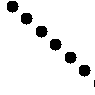

In [0]:
img.convert("L")

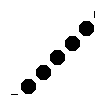

In [0]:
img2.convert("L")

In [0]:
def create_random_images(num=1, array=False, direct='', colors=False, stripe=False, diff_widths=False, convert=False, blurred=False, implied=False):
  images = []
  for n in range(0, num):
    ls = randint(1,15)
    ws = randint(1,7)
      
    reverse_colors = False
    if colors:
      reverse_colors = bool(getrandbits(1))
    
    add_stripe = False
    if stripe:
      add_stripe = bool(getrandbits(1))
    
    different_widths = False
    if diff_widths:
      different_widths = bool(getrandbits(1))
      
    add_blur = False
    if blurred:
      add_blur = bool(getrandbits(1))
    
    img, img2 = create_pos_neg_images(ls, ws, reverse_colors, add_stripe, different_widths, add_blur, implied_lines=implied)
    
    if convert:
      img = img.convert("L")
      img2 = img2.convert("L")
    
    if array:
      # if "array" put images in an array
      images.extend([img, img2])
    else:
      # save images
      img.save(direct + 'neg_img_' + str(n) + '.png', "PNG")
      img2.save(direct + 'pos_img_' + str(n) + '.png', "PNG")
  
  if array:  
    return images
  else:
    print('Done')
    return True

In [0]:
images = create_random_images(8, True, colors=True, stripe=True, diff_widths=True, convert=True, blurred=True)

fig=plt.figure(figsize=(4, 12))
columns = 2

rows = int(len(images) / 2)

for ind, i in enumerate(images):
  a=fig.add_subplot(rows, columns,ind+1)
  plt.imshow(i, cmap='Greys')
  plt.axis('off')
plt.show()

In [0]:
images = create_random_images(num=20000, array=True, direct='./ex_imgs/', colors=True, stripe=True, diff_widths=True, convert=True, blurred=True)

In [0]:
arr = np.array([0, 1])

y = np.tile(arr, int(len(images)/2))

In [0]:
for ind, img in enumerate(images):
  images[ind] = img_to_array(img)

# Model

In [0]:
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [0]:
def create_model_2(conv2=True, conv3=True, dense2=True, dense3=True, maxpool=True):

  model = Sequential()
  
  model.add(Conv2D(6, kernel_size=(3, 3), activation='relu', data_format='channels_last', input_shape=(95, 95, 1,)))
  
  if maxpool:
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  if conv2:
    model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', data_format='channels_last'))

    if maxpool:
      model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  if conv3:
    model.add(Conv2D(12, kernel_size=(3, 3), activation='relu', data_format='channels_last'))

    if maxpool:
      model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  
  
  model.add(Flatten())
    
  model.add(Dense(1024, activation='relu', kernel_initializer='glorot_uniform'))
    
  if dense2:
    model.add(Dense(1024, activation='relu', kernel_initializer='glorot_uniform'))
    
  if dense3:
    model.add(Dense(1024, activation='relu', kernel_initializer='glorot_uniform'))
      
  model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))

  model.compile(loss='binary_crossentropy', 
                optimizer=Adam(lr=0.0003, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
                metrics=['accuracy'])
  
  return model

In [0]:
model2 = create_model_2()

model2.summary()

h = model2.fit(np.array(X_train), y_train, epochs=10, verbose=2, shuffle=True, validation_data=(np.array(X_valid), y_valid))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 93, 93, 6)         60        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 46, 46, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 44, 44, 8)         440       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 12)        876       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 12)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1200)              0         
__________

W0808 10:19:05.913633 140089310369664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 32400 samples, validate on 3600 samples
Epoch 1/10
 - 21s - loss: 0.0754 - acc: 0.9777 - val_loss: 0.0354 - val_acc: 0.9836
Epoch 2/10
 - 15s - loss: 0.0712 - acc: 0.9759 - val_loss: 0.0430 - val_acc: 0.9708
Epoch 3/10
 - 15s - loss: 0.0939 - acc: 0.9696 - val_loss: 0.0516 - val_acc: 0.9778
Epoch 4/10
 - 15s - loss: 0.0433 - acc: 0.9766 - val_loss: 0.0365 - val_acc: 0.9831
Epoch 5/10
 - 15s - loss: 0.0354 - acc: 0.9821 - val_loss: 0.0242 - val_acc: 0.9811
Epoch 6/10
 - 15s - loss: 0.0326 - acc: 0.9864 - val_loss: 0.0292 - val_acc: 0.9806
Epoch 7/10
 - 15s - loss: 0.2207 - acc: 0.9771 - val_loss: 0.0231 - val_acc: 0.9856
Epoch 8/10
 - 15s - loss: 0.0260 - acc: 0.9840 - val_loss: 0.0220 - val_acc: 0.9842
Epoch 9/10
 - 15s - loss: 0.0308 - acc: 0.9824 - val_loss: 0.0390 - val_acc: 0.9839
Epoch 10/10
 - 15s - loss: 0.0390 - acc: 0.9813 - val_loss: 0.0404 - val_acc: 0.9789


In [0]:
y_pred = model2.predict(np.array(X_test))

In [0]:
score = 0

for yp, yt in zip(y_pred, y_test):
  if yp == yt:
    score += 1

In [0]:
score/len(y_test)

0.93025

## simple runs

In [0]:
convs = [[False, False], [True, False], [True, True]]
maxpool = [True]
denses = [[False, False], [True, False], [True, True]]
datas = [2000, 5000, 10000, 15000, 20000]

In [0]:
hists = {}

for d in datas:
  
  imgs = images[:d]
  y_ = y[:d]
  X_train, X_test, y_train, y_test = train_test_split(imgs, y_, test_size=0.1, random_state=42)
  X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
  
  hists[d] = {}
  
  for c in convs:
    conv_name = str(1 + np.sum(c))
    hists[d][conv_name] = {}
    for ds in denses:
      dens_name = str(1 + np.sum(ds))
      hists[d][conv_name][dens_name] = {}
      for mp in maxpool:
        
        print(str(d) + '_' + conv_name + '_' + dens_name + '_' + str(mp))
        
        mod = create_model_2(c[0], c[1], ds[0], ds[1], mp)
        
        h = mod.fit(np.array(X_train), y_train, epochs=10, verbose=0, shuffle=True, validation_data=(np.array(X_valid), y_valid))
        
        hists[d][conv_name][dens_name][mp] = h.history
        
        K.clear_session()
        del mod
  del X_train, X_valid, y_train, y_valid, X_test, y_test

In [0]:
K.clear_session()
del mod
del X_train, X_valid, y_train, y_valid, X_test, y_test

In [0]:
import json
with open('hists.json', 'w') as fp:
    json.dump(hists, fp)

In [0]:
link = '1mdBuvT2U6qt2LMV9Lu9vkDWW0Atl8ICx'

downloaded = drive.CreateFile({'id':link}) 
downloaded.GetContentFile('hists.json') 

In [0]:

with open('hists.json') as f:
    hists = json.load(f)

In [0]:
for k in hists.keys():
  print(k)

2000
5000
10000
15000
20000


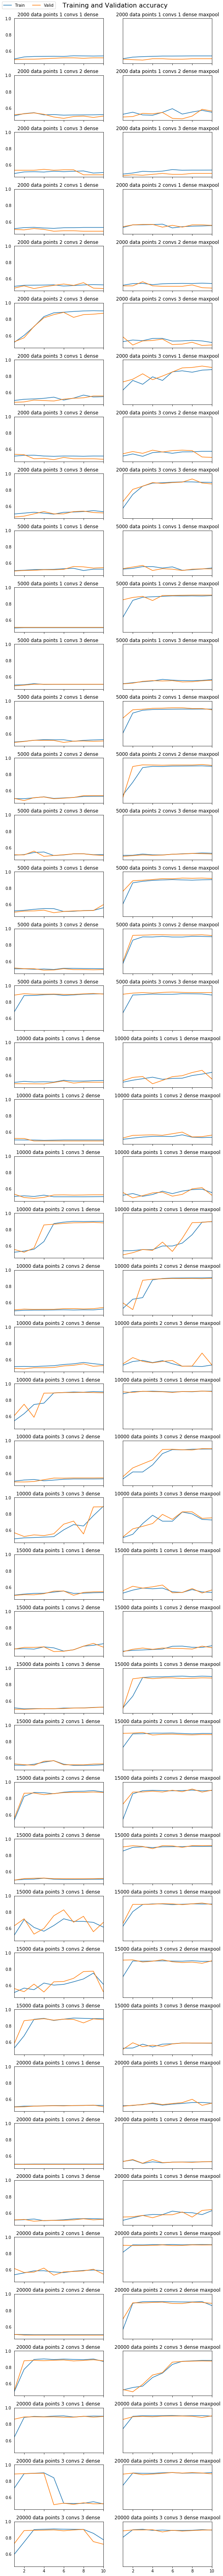

In [0]:
columns = 2

rows = 45

fig, axes = plt.subplots(rows, columns, figsize=(8, 90), sharex=True, sharey=True)

i = 0

for d_num, h in hists.items():
  # iterate over number of convolution layers
  for c_num, cc in h.items():
    # iterate over number of dense layers
    for l_num, ll in cc.items():
      # maxpooling or not?
      for b, bb in ll.items():
        tit = str(d_num) + ' data points ' + str(c_num) + ' convs ' + str(l_num) + ' dense '
        if b == 'true':
          tit += 'maxpool'
        a = axes.ravel()[i]
        a.set_title(tit)
        a.plot(range(1, 11), bb['acc'], label='Train')
        a.plot(range(1, 11), bb['val_acc'], label='Valid')
        a.yaxis.set_ticks_position('none')
        a.axis([1, 10, 0.45, 1.0])
        i += 1

# for ind, i in enumerate(images):
#   a=fig.add_subplot(rows, columns,ind+1)
#   plt.imshow(i)
fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Training and Validation accuracy', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.show()

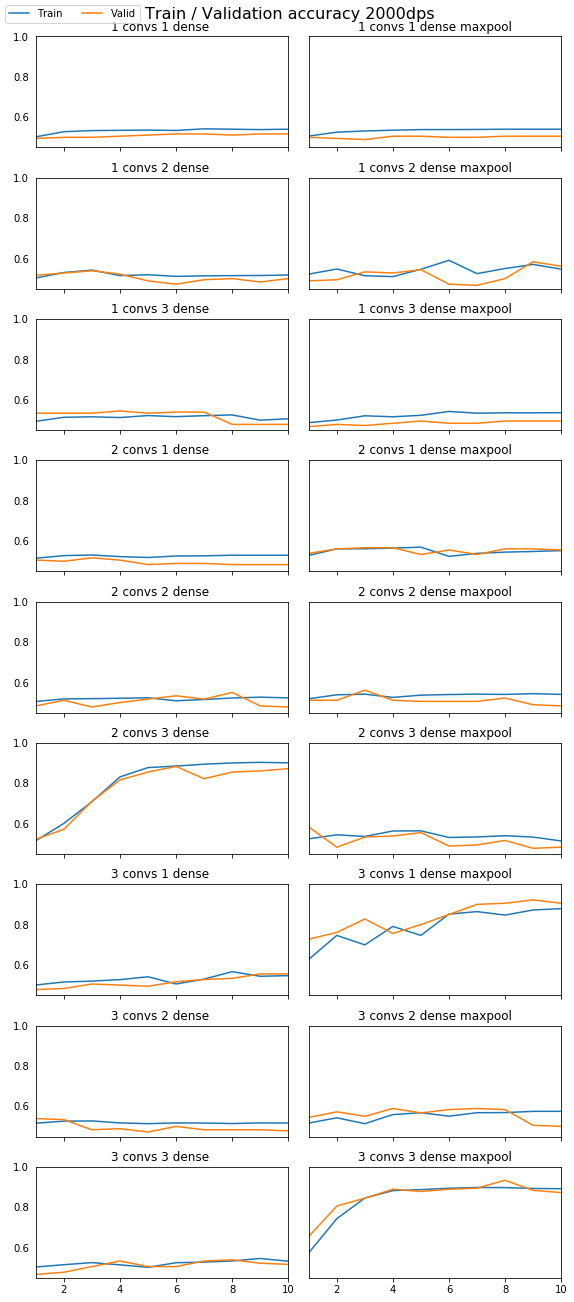

In [0]:
columns = 2

rows = 9

fig, axes = plt.subplots(rows, columns, figsize=(8, 18), sharex=True, sharey=True)

i = 0

for d_num, h in hists.items():
  if d_num != '2000':
    break
  # iterate over number of convolution layers
  for c_num, cc in h.items():
    # iterate over number of dense layers
    for l_num, ll in cc.items():
      # maxpooling or not?
      for b, bb in ll.items():
        tit = str(c_num) + ' convs ' + str(l_num) + ' dense '
        if b == 'true':
          tit += 'maxpool'
        a = axes.ravel()[i]
        a.set_title(tit)
        a.plot(range(1, 11), bb['acc'], label='Train')
        a.plot(range(1, 11), bb['val_acc'], label='Valid')
        a.yaxis.set_ticks_position('none')
        a.axis([1, 10, 0.45, 1.0])
        i += 1

# for ind, i in enumerate(images):
#   a=fig.add_subplot(rows, columns,ind+1)
#   plt.imshow(i)
fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Train / Validation accuracy 2000dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.show()

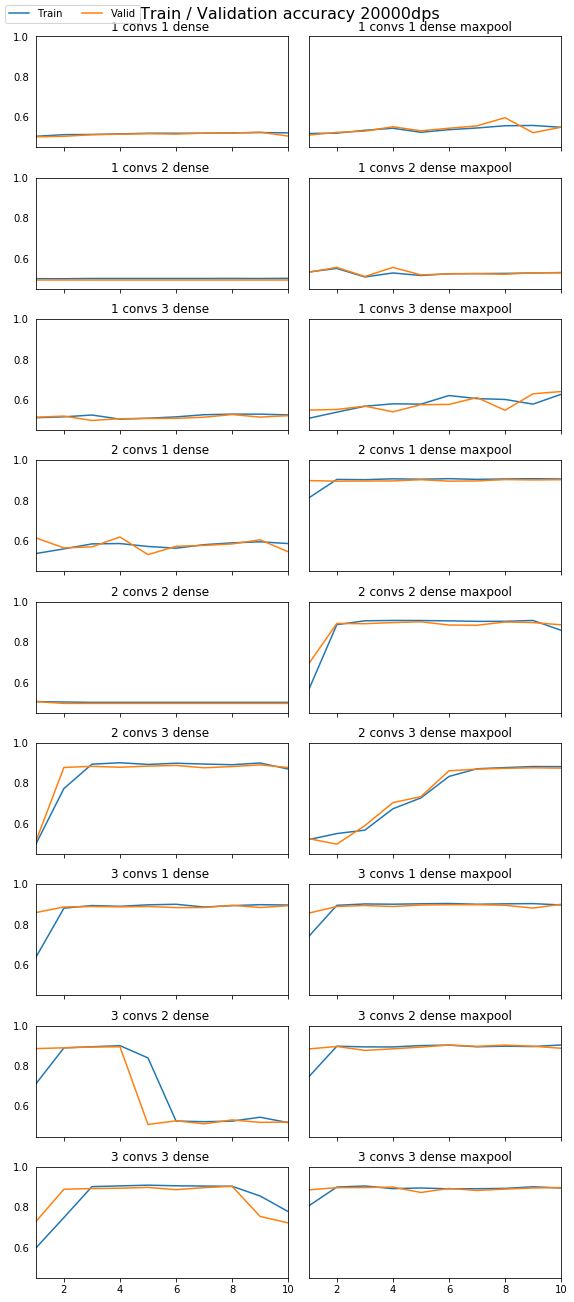

In [0]:
columns = 2

rows = 9

fig, axes = plt.subplots(rows, columns, figsize=(8, 18), sharex=True, sharey=True)

i = 0

for d_num, h in hists.items():
  if d_num != '20000':
    continue
  if int(d_num) > 20000:
    break
  # iterate over number of convolution layers
  for c_num, cc in h.items():
    # iterate over number of dense layers
    for l_num, ll in cc.items():
      # maxpooling or not?
      for b, bb in ll.items():
        tit = str(c_num) + ' convs ' + str(l_num) + ' dense '
        if b == 'true':
          tit += 'maxpool'
        a = axes.ravel()[i]
        a.set_title(tit)
        a.plot(range(1, 11), bb['acc'], label='Train')
        a.plot(range(1, 11), bb['val_acc'], label='Valid')
        a.yaxis.set_ticks_position('none')
        a.axis([1, 10, 0.45, 1.0])
        i += 1

# for ind, i in enumerate(images):
#   a=fig.add_subplot(rows, columns,ind+1)
#   plt.imshow(i)
fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Train / Validation accuracy 20000dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.show()

## Do many times

In [0]:
tot_hists = []
tot_evals = []

mp = True

for i in range(0, 10):
  print(i+1)
  hists = {}
  evals = {}

  for d in datas:

    imgs = images[:d]
    y_ = y[:d]
    X_train, X_test, y_train, y_test = train_test_split(imgs, y_, test_size=0.1, random_state=42)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

    hists[d] = {}
    evals[d] = {}

    for c in convs:
      conv_name = str(1 + np.sum(c))
      hists[d][conv_name] = {}
      evals[d][conv_name] = {}
      for ds in denses:
        dens_name = str(1 + np.sum(ds))

        print(str(d) + '_' + conv_name + '_' + dens_name + '_' + str(mp))

        mod = create_model_2(c[0], c[1], ds[0], ds[1], mp)

        h = mod.fit(np.array(X_train), y_train, epochs=8, verbose=0, shuffle=True, validation_data=(np.array(X_valid), y_valid))

        hists[d][conv_name][dens_name] = h.history

        test_loss, test_acc = mod.evaluate(np.array(X_test), np.array(y_test), verbose=0)
        
        evals[d][conv_name][dens_name] = {"test_loss": test_loss, "test_acc": test_acc}
        
        K.clear_session()
        del mod
    del X_train, X_valid, y_train, y_valid, X_test, y_test
  tot_hists.append(hists)
  tot_evals.append(evals)

1
2000_1_1_True
2000_1_2_True
2000_1_3_True
2000_2_1_True
2000_2_2_True
2000_2_3_True
2000_3_1_True
2000_3_2_True
2000_3_3_True
5000_1_1_True
5000_1_2_True
5000_1_3_True
5000_2_1_True
5000_2_2_True
5000_2_3_True
5000_3_1_True
5000_3_2_True
5000_3_3_True
10000_1_1_True
10000_1_2_True
10000_1_3_True
10000_2_1_True
10000_2_2_True
10000_2_3_True
10000_3_1_True
10000_3_2_True
10000_3_3_True
15000_1_1_True
15000_1_2_True
15000_1_3_True
15000_2_1_True
15000_2_2_True
15000_2_3_True
15000_3_1_True
15000_3_2_True
15000_3_3_True
20000_1_1_True
20000_1_2_True
20000_1_3_True
20000_2_1_True
20000_2_2_True
20000_2_3_True
20000_3_1_True
20000_3_2_True
20000_3_3_True
2
2000_1_1_True
2000_1_2_True
2000_1_3_True
2000_2_1_True
2000_2_2_True
2000_2_3_True
2000_3_1_True
2000_3_2_True
2000_3_3_True
5000_1_1_True
5000_1_2_True
5000_1_3_True
5000_2_1_True
5000_2_2_True
5000_2_3_True
5000_3_1_True
5000_3_2_True
5000_3_3_True
10000_1_1_True
10000_1_2_True
10000_1_3_True
10000_2_1_True
10000_2_2_True
10000_2_3_Tr

In [0]:
f = open('./tot_hists_re', 'w')

In [0]:
json.dump(tot_hists, f)

In [0]:
f.close()

In [0]:
f = open('./tot_evals_re', 'w')
json.dump(tot_evals, f)
f.close()

In [0]:
f = open('./tot_hists_re', 'r')
tot_hists = json.load(f)
f.close()

In [0]:
f = open('./tot_evals_re', 'r')
tot_evals = json.load(f)
f.close()

In [0]:
n_hists = {}

for h in tot_hists:
  for d, hh in h.items():
    if d not in n_hists:
      n_hists[d] = {}

    for c, hhh in hh.items():
      if c not in n_hists[d]:
        n_hists[d][c] = {}
      
      for l, a in hhh.items():
        if l not in n_hists[d][c]:
          n_hists[d][c][l] = {}
        
        for st, val  in a.items(): 
          if st not in n_hists[d][c][l]:
            n_hists[d][c][l][st] = []
          n_hists[d][c][l][st].append(val)

In [0]:
h_m = {}
h_s = {}

for d, h in n_hists.items():
  if d not in h_m:
    h_m[d] = {}
  if d not in h_s:
    h_s[d] = {}
  
  for c, ds in h.items():
    if c not in h_m[d]:
      h_m[d][c] = {}
    if c not in h_s[d]:
      h_s[d][c] = {}
      
    for l, sts in ds.items():
      if l not in h_m[d][c]:
        h_m[d][c][l] = {}
      if l not in h_s[d][c]:
        h_s[d][c][l] = {}
        
      for st, val in sts.items():
        if st not in h_m[d][c][l]:
          h_m[d][c][l][st] = np.array(val).mean(0)
        if st not in h_s[d][c][l]:
          h_s[d][c][l][st] = np.array(val).std(0)

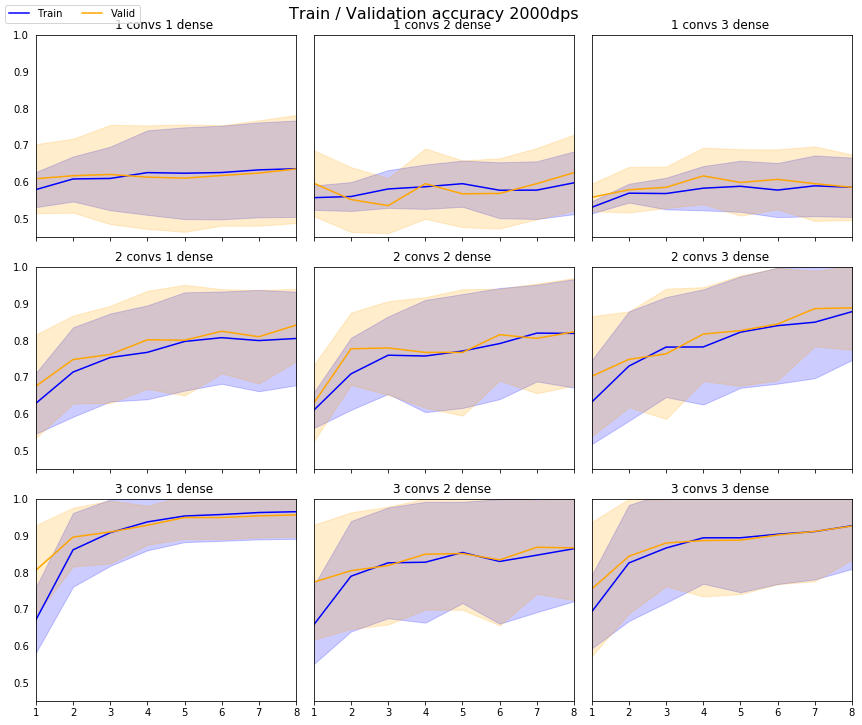

In [0]:
columns = 3

rows = 3

fig, axes = plt.subplots(rows, columns, figsize=(12, 10), sharex=True, sharey=True)

i = 0

for d_num, h in h_m.items():
  if int(d_num) != 2000:
    continue
  if int(d_num) > 2000:
    break
  # iterate over number of convolution layers
  for c_num, cc in h.items():
    # iterate over number of dense layers
    for l_num, ll in cc.items():
      tit = str(c_num) + ' convs ' + str(l_num) + ' dense '
      a = axes.ravel()[i]
      a.set_title(tit)
      a.plot(range(1, 9), ll['acc'], color='blue', label='Train')
      a.fill_between(range(1, 9), ll['acc'] - h_s[d_num][c_num][l_num]['acc'], ll['acc'] + h_s[d_num][c_num][l_num]['acc'], color='blue', alpha=0.2)
      
      a.plot(range(1, 9), ll['val_acc'], color='orange', label='Valid')
      a.fill_between(range(1, 9), ll['val_acc'] - h_s[d_num][c_num][l_num]['val_acc'], ll['val_acc'] + h_s[d_num][c_num][l_num]['val_acc'], color='orange', alpha=0.2)
      a.yaxis.set_ticks_position('none')
      a.axis([1, 8, 0.45, 1.0])
      i += 1

fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Train / Validation accuracy 2000dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.show()

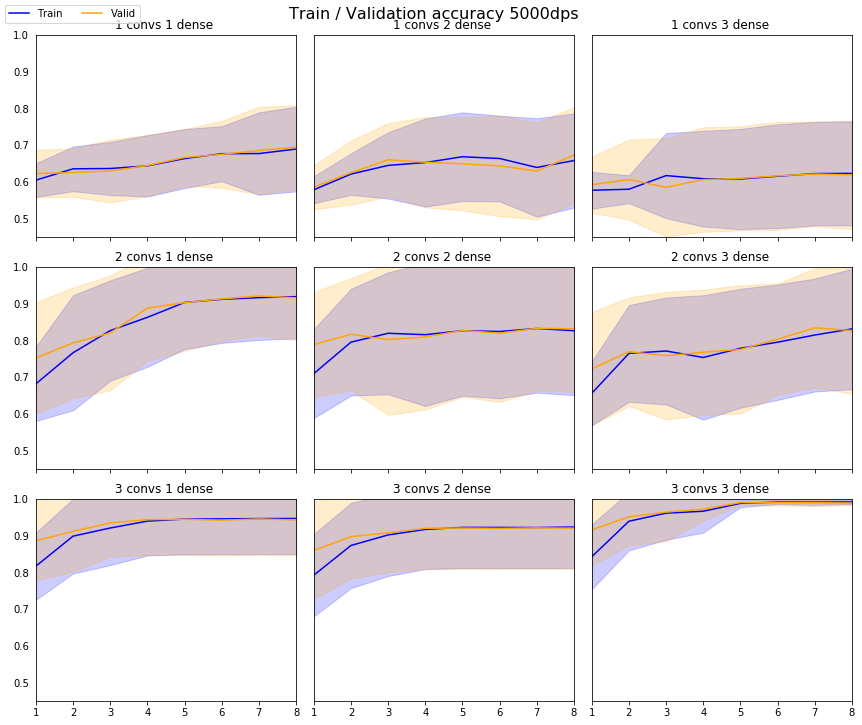

In [0]:
columns = 3

rows = 3

fig, axes = plt.subplots(rows, columns, figsize=(12, 10), sharex=True, sharey=True)

i = 0

for d_num, h in h_m.items():
  if int(d_num) != 5000:
    continue
  if int(d_num) > 5000:
    break
  # iterate over number of convolution layers
  for c_num, cc in h.items():
    # iterate over number of dense layers
    for l_num, ll in cc.items():
      tit = str(c_num) + ' convs ' + str(l_num) + ' dense '
      a = axes.ravel()[i]
      a.set_title(tit)
      a.plot(range(1, 9), ll['acc'], color='blue', label='Train')
      a.fill_between(range(1, 9), ll['acc'] - h_s[d_num][c_num][l_num]['acc'], ll['acc'] + h_s[d_num][c_num][l_num]['acc'], color='blue', alpha=0.2)
      
      a.plot(range(1, 9), ll['val_acc'], color='orange', label='Valid')
      a.fill_between(range(1, 9), ll['val_acc'] - h_s[d_num][c_num][l_num]['val_acc'], ll['val_acc'] + h_s[d_num][c_num][l_num]['val_acc'], color='orange', alpha=0.2)
      a.yaxis.set_ticks_position('none')
      a.axis([1, 8, 0.45, 1.0])
      i += 1

fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Train / Validation accuracy 5000dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.show()

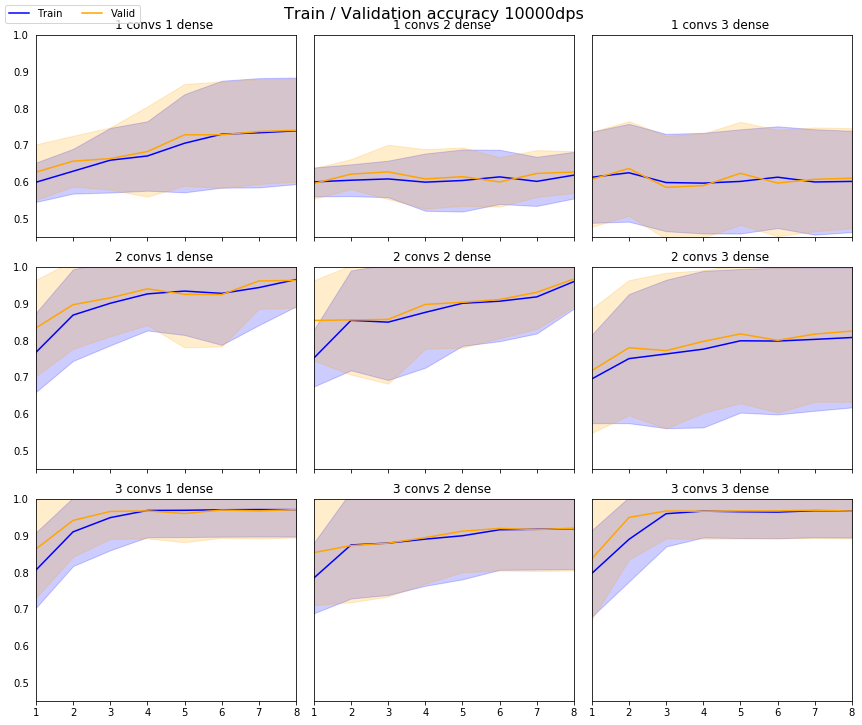

In [0]:
columns = 3

rows = 3

fig, axes = plt.subplots(rows, columns, figsize=(12, 10), sharex=True, sharey=True)

i = 0

for d_num, h in h_m.items():
  if int(d_num) != 10000:
    continue
  if int(d_num) > 10000:
    break
  # iterate over number of convolution layers
  for c_num, cc in h.items():
    # iterate over number of dense layers
    for l_num, ll in cc.items():
      tit = str(c_num) + ' convs ' + str(l_num) + ' dense '
      a = axes.ravel()[i]
      a.set_title(tit)
      a.plot(range(1, 9), ll['acc'], color='blue', label='Train')
      a.fill_between(range(1, 9), ll['acc'] - h_s[d_num][c_num][l_num]['acc'], ll['acc'] + h_s[d_num][c_num][l_num]['acc'], color='blue', alpha=0.2)
      
      a.plot(range(1, 9), ll['val_acc'], color='orange', label='Valid')
      a.fill_between(range(1, 9), ll['val_acc'] - h_s[d_num][c_num][l_num]['val_acc'], ll['val_acc'] + h_s[d_num][c_num][l_num]['val_acc'], color='orange', alpha=0.2)
      a.yaxis.set_ticks_position('none')
      a.axis([1, 8, 0.45, 1.0])
      i += 1

fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Train / Validation accuracy 10000dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.show()

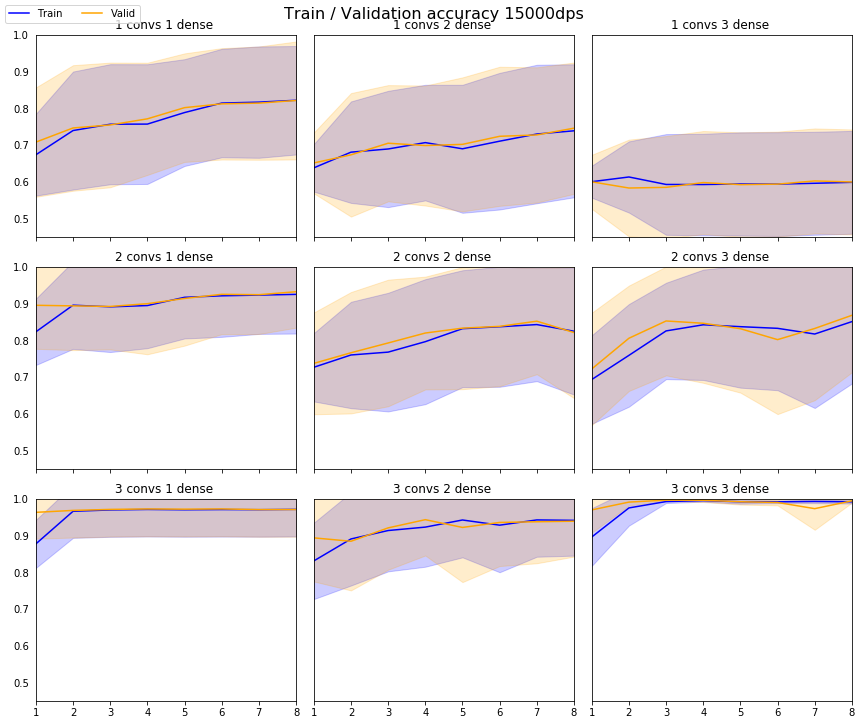

In [0]:
columns = 3

rows = 3

fig, axes = plt.subplots(rows, columns, figsize=(12, 10), sharex=True, sharey=True)

i = 0

for d_num, h in h_m.items():
  if int(d_num) != 15000:
    continue
  if int(d_num) > 15000:
    break
  # iterate over number of convolution layers
  for c_num, cc in h.items():
    # iterate over number of dense layers
    for l_num, ll in cc.items():
      tit = str(c_num) + ' convs ' + str(l_num) + ' dense '
      a = axes.ravel()[i]
      a.set_title(tit)
      a.plot(range(1, 9), ll['acc'], color='blue', label='Train')
      a.fill_between(range(1, 9), ll['acc'] - h_s[d_num][c_num][l_num]['acc'], ll['acc'] + h_s[d_num][c_num][l_num]['acc'], color='blue', alpha=0.2)
      
      a.plot(range(1, 9), ll['val_acc'], color='orange', label='Valid')
      a.fill_between(range(1, 9), ll['val_acc'] - h_s[d_num][c_num][l_num]['val_acc'], ll['val_acc'] + h_s[d_num][c_num][l_num]['val_acc'], color='orange', alpha=0.2)
      a.yaxis.set_ticks_position('none')
      a.axis([1, 8, 0.45, 1.0])
      i += 1

fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Train / Validation accuracy 15000dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.show()

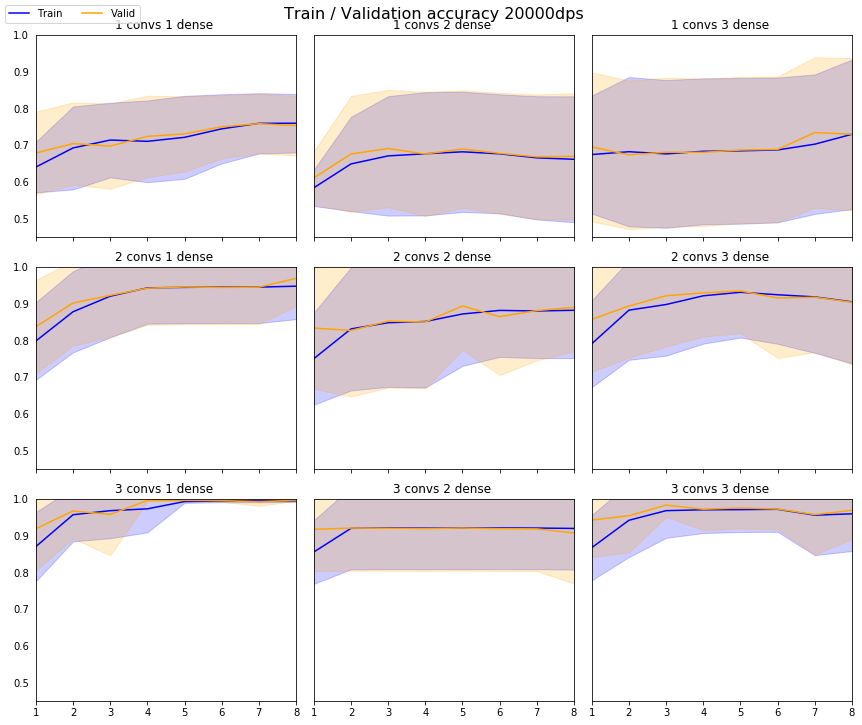

In [0]:
columns = 3

rows = 3

fig, axes = plt.subplots(rows, columns, figsize=(12, 10), sharex=True, sharey=True)

i = 0

for d_num, h in h_m.items():
  if int(d_num) != 20000:
    continue
  if int(d_num) > 20000:
    break
  # iterate over number of convolution layers
  for c_num, cc in h.items():
    # iterate over number of dense layers
    for l_num, ll in cc.items():
      tit = str(c_num) + ' convs ' + str(l_num) + ' dense '
      a = axes.ravel()[i]
      a.set_title(tit)
      a.plot(range(1, 9), ll['acc'], color='blue', label='Train')
      a.fill_between(range(1, 9), ll['acc'] - h_s[d_num][c_num][l_num]['acc'], ll['acc'] + h_s[d_num][c_num][l_num]['acc'], color='blue', alpha=0.2)
      
      a.plot(range(1, 9), ll['val_acc'], color='orange', label='Valid')
      a.fill_between(range(1, 9), ll['val_acc'] - h_s[d_num][c_num][l_num]['val_acc'], ll['val_acc'] + h_s[d_num][c_num][l_num]['val_acc'], color='orange', alpha=0.2)
      a.yaxis.set_ticks_position('none')
      a.axis([1, 8, 0.45, 1.0])
      i += 1

fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Train / Validation accuracy 20000dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.show()

In [0]:
accs = {}

for t in tot_evals:
  for num, tt in t.items():
    if num not in accs:
      accs[num] = {}
    for conv, ttt in tt.items():
      if conv not in accs[num]:
        accs[num][conv] = {}
      for ls, vals in ttt.items():
        if ls not in accs[num][conv]:
          accs[num][conv][ls] = []
        accs[num][conv][ls].append(vals['test_acc'])

In [0]:
test_ms = {}
test_st = {}

for num, t in accs.items():
  if num not in test_ms:
    test_ms[num] = {}
    test_st[num] = {}
  for conv, tt in t.items():
    if conv not in test_ms[num]:
      test_ms[num][conv] = {}
      test_st[num][conv] = {}
    for ls, vals in tt.items():
      test_ms[num][conv][ls] = np.array(vals).mean()
      test_st[num][conv][ls] = np.array(vals).std()

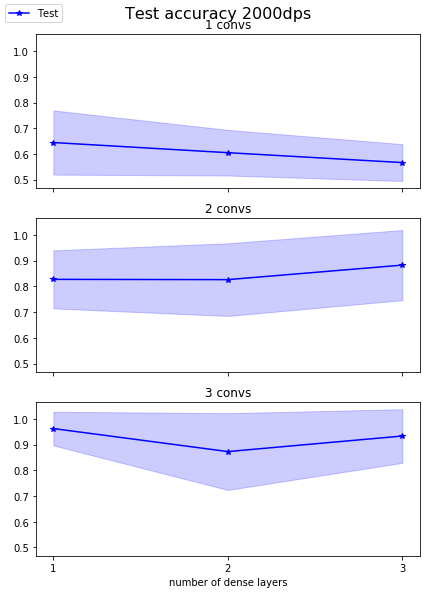

In [0]:
columns = 1
rows = 3
fig, axes = plt.subplots(rows, columns, figsize=(6,8), sharex=True, sharey=True)
i = 0

for num, t in test_ms.items():
  if int(num) != 2000:
    continue
  if int(num) > 2000:
    break
  for conv, tt in t.items():
    a = axes.ravel()[i]
    tit = str(conv) + ' convs'
    a.set_title(tit)
    a.plot(range(1, 4), tt.values(), '*-', color='blue', label='Test')
    a.fill_between(range(1, 4), np.array(list(tt.values())) - np.array(list(test_st[num][conv].values())), np.array(list(tt.values())) + np.array(list(test_st[num][conv].values())), color='blue', alpha=0.2)
    i += 1
fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Test accuracy 2000dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.xlabel('number of dense layers')
plt.xticks(range(1,4))
plt.show()

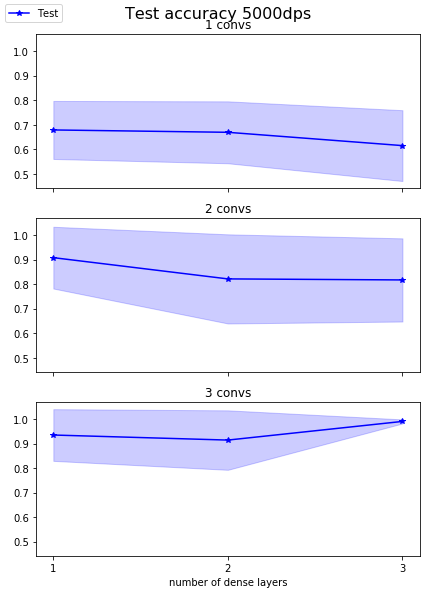

In [0]:
columns = 1
rows = 3
fig, axes = plt.subplots(rows, columns, figsize=(6,8), sharex=True, sharey=True)
i = 0

for num, t in test_ms.items():
  if int(num) != 5000:
    continue
  if int(num) > 5000:
    break
  for conv, tt in t.items():
    a = axes.ravel()[i]
    tit = str(conv) + ' convs'
    a.set_title(tit)
    a.plot(range(1, 4), tt.values(), '*-', color='blue', label='Test')
    a.fill_between(range(1, 4), np.array(list(tt.values())) - np.array(list(test_st[num][conv].values())), np.array(list(tt.values())) + np.array(list(test_st[num][conv].values())), color='blue', alpha=0.2)
    i += 1
fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Test accuracy 5000dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.xlabel('number of dense layers')
plt.xticks(range(1,4))
plt.show()

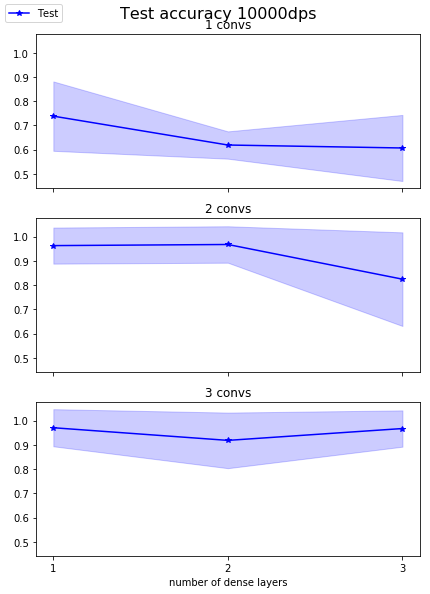

In [0]:
columns = 1
rows = 3
fig, axes = plt.subplots(rows, columns, figsize=(6,8), sharex=True, sharey=True)
i = 0

for num, t in test_ms.items():
  if int(num) != 10000:
    continue
  if int(num) > 10000:
    break
  for conv, tt in t.items():
    a = axes.ravel()[i]
    tit = str(conv) + ' convs'
    a.set_title(tit)
    a.plot(range(1, 4), tt.values(), '*-', color='blue', label='Test')
    a.fill_between(range(1, 4), np.array(list(tt.values())) - np.array(list(test_st[num][conv].values())), np.array(list(tt.values())) + np.array(list(test_st[num][conv].values())), color='blue', alpha=0.2)
    i += 1
fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Test accuracy 10000dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.xlabel('number of dense layers')
plt.xticks(range(1,4))
plt.show()

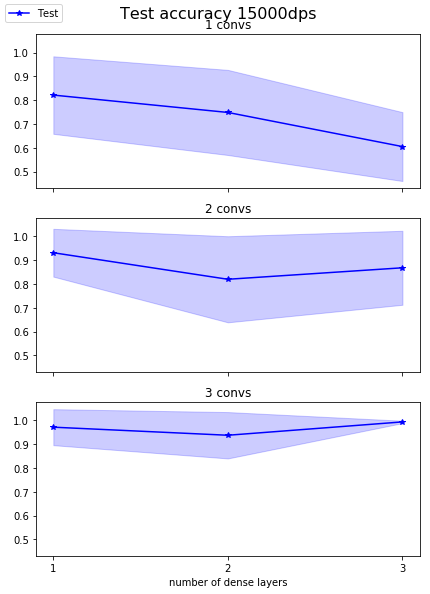

In [0]:
columns = 1
rows = 3
fig, axes = plt.subplots(rows, columns, figsize=(6,8), sharex=True, sharey=True)
i = 0

for num, t in test_ms.items():
  if int(num) != 15000:
    continue
  if int(num) > 15000:
    break
  for conv, tt in t.items():
    a = axes.ravel()[i]
    tit = str(conv) + ' convs'
    a.set_title(tit)
    a.plot(range(1, 4), tt.values(), '*-', color='blue', label='Test')
    a.fill_between(range(1, 4), np.array(list(tt.values())) - np.array(list(test_st[num][conv].values())), np.array(list(tt.values())) + np.array(list(test_st[num][conv].values())), color='blue', alpha=0.2)
    i += 1
fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Test accuracy 15000dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.xlabel('number of dense layers')
plt.xticks(range(1,4))
plt.show()

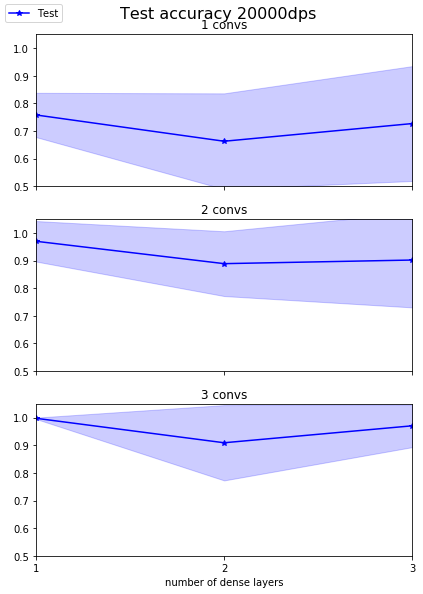

In [0]:
columns = 1
rows = 3
fig, axes = plt.subplots(rows, columns, figsize=(6,8), sharex=True, sharey=True)
i = 0

for num, t in test_ms.items():
  if int(num) != 20000:
    continue
  if int(num) > 20000:
    break
  for conv, tt in t.items():
    a = axes.ravel()[i]
    tit = str(conv) + ' convs'
    a.set_title(tit)
    a.plot(range(1, 4), tt.values(), '*-', color='blue', label='Test')
    a.fill_between(range(1, 4), np.array(list(tt.values())) - np.array(list(test_st[num][conv].values())), np.array(list(tt.values())) + np.array(list(test_st[num][conv].values())), color='blue', alpha=0.2)
    a.axis([1, 3, 0.5, 1.05])
    i += 1
fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Test accuracy 20000dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.xlabel('number of dense layers')
plt.xticks(range(1,4))
plt.show()

## try with less data

In [0]:
convs = [[False, False], [True, False], [True, True]]
maxpool = [False, True]
denses = [[False, False], [True, False], [True, True]]
datas = [50, 100, 500, 1000]

In [0]:
images = create_random_images(num=1000, array=True, direct='./ex_imgs/', colors=True, stripe=True, diff_widths=True, convert=True, blurred=True)
arr = np.array([0, 1])

y = np.tile(arr, int(len(images)/2))
for ind, img in enumerate(images):
  images[ind] = img_to_array(img)

In [0]:
tot_hists = []
tot_evals = []

mp = True

for i in range(0, 10):
  print(i+1)
  hists = {}
  evals = {}

  for d in datas:

    imgs = images[:d]
    y_ = y[:d]
    X_train, X_test, y_train, y_test = train_test_split(imgs, y_, test_size=0.1, random_state=42)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

    hists[d] = {}
    evals[d] = {}

    for c in convs:
      conv_name = str(1 + np.sum(c))
      hists[d][conv_name] = {}
      evals[d][conv_name] = {}
      for ds in denses:
        dens_name = str(1 + np.sum(ds))

        print(str(d) + '_' + conv_name + '_' + dens_name + '_' + str(mp))

        mod = create_model_2(c[0], c[1], ds[0], ds[1], mp)

        h = mod.fit(np.array(X_train), y_train, epochs=8, verbose=0, shuffle=True, validation_data=(np.array(X_valid), y_valid))

        hists[d][conv_name][dens_name] = h.history

        test_loss, test_acc = mod.evaluate(np.array(X_test), np.array(y_test), verbose=0)
        
        evals[d][conv_name][dens_name] = {"test_loss": test_loss, "test_acc": test_acc}
        
        K.clear_session()
        del mod
    del X_train, X_valid, y_train, y_valid, X_test, y_test
  tot_hists.append(hists)
  tot_evals.append(evals)

W0816 11:25:25.888596 140127493744512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0816 11:25:25.942288 140127493744512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0816 11:25:25.951559 140127493744512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0816 11:25:25.988280 140127493744512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0816 11:25:26.050123 140127493744512 deprecation_wrapp

1
50_1_1_True


W0816 11:25:26.316588 140127493744512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



50_1_2_True
50_1_3_True
50_2_1_True
50_2_2_True
50_2_3_True
50_3_1_True
50_3_2_True
50_3_3_True
100_1_1_True
100_1_2_True
100_1_3_True
100_2_1_True
100_2_2_True
100_2_3_True
100_3_1_True
100_3_2_True
100_3_3_True
500_1_1_True
500_1_2_True
500_1_3_True
500_2_1_True
500_2_2_True
500_2_3_True
500_3_1_True
500_3_2_True
500_3_3_True
1000_1_1_True
1000_1_2_True
1000_1_3_True
1000_2_1_True
1000_2_2_True
1000_2_3_True
1000_3_1_True
1000_3_2_True
1000_3_3_True
2
50_1_1_True
50_1_2_True
50_1_3_True
50_2_1_True
50_2_2_True
50_2_3_True
50_3_1_True
50_3_2_True
50_3_3_True
100_1_1_True
100_1_2_True
100_1_3_True
100_2_1_True
100_2_2_True
100_2_3_True
100_3_1_True
100_3_2_True
100_3_3_True
500_1_1_True
500_1_2_True
500_1_3_True
500_2_1_True
500_2_2_True
500_2_3_True
500_3_1_True
500_3_2_True
500_3_3_True
1000_1_1_True
1000_1_2_True
1000_1_3_True
1000_2_1_True
1000_2_2_True
1000_2_3_True
1000_3_1_True
1000_3_2_True
1000_3_3_True
3
50_1_1_True
50_1_2_True
50_1_3_True
50_2_1_True
50_2_2_True
50_2_3_True


### first time results

In [0]:
f = open('./tot_hists_small', 'w')
json.dump(tot_hists, f)
f.close()

In [0]:
f = open('./tot_evals_small', 'w')
json.dump(tot_evals, f)
f.close()

In [0]:
f = open('./tot_hists_small', 'r')
tot_hists = json.load(f)
f.close()

In [0]:
n_hists = {}

for h in tot_hists:
  for d, hh in h.items():
    if d not in n_hists:
      n_hists[d] = {}

    for c, hhh in hh.items():
      if c not in n_hists[d]:
        n_hists[d][c] = {}
      
      for l, a in hhh.items():
        if l not in n_hists[d][c]:
          n_hists[d][c][l] = {}
        
        for st, val  in a.items(): 
          if st not in n_hists[d][c][l]:
            n_hists[d][c][l][st] = []
          n_hists[d][c][l][st].append(val)
# print(n_hists)

In [0]:
h_m = {}
h_s = {}

for d, h in n_hists.items():
  if d not in h_m:
    h_m[d] = {}
  if d not in h_s:
    h_s[d] = {}
  
  for c, ds in h.items():
    if c not in h_m[d]:
      h_m[d][c] = {}
    if c not in h_s[d]:
      h_s[d][c] = {}
      
    for l, sts in ds.items():
      if l not in h_m[d][c]:
        h_m[d][c][l] = {}
      if l not in h_s[d][c]:
        h_s[d][c][l] = {}
        
      for st, val in sts.items():
        if st not in h_m[d][c][l]:
          h_m[d][c][l][st] = np.array(val).mean(0)
        if st not in h_s[d][c][l]:
          h_s[d][c][l][st] = np.array(val).std(0)

In [0]:
h_m.keys()

dict_keys(['10', '50', '100', '500', '1000'])

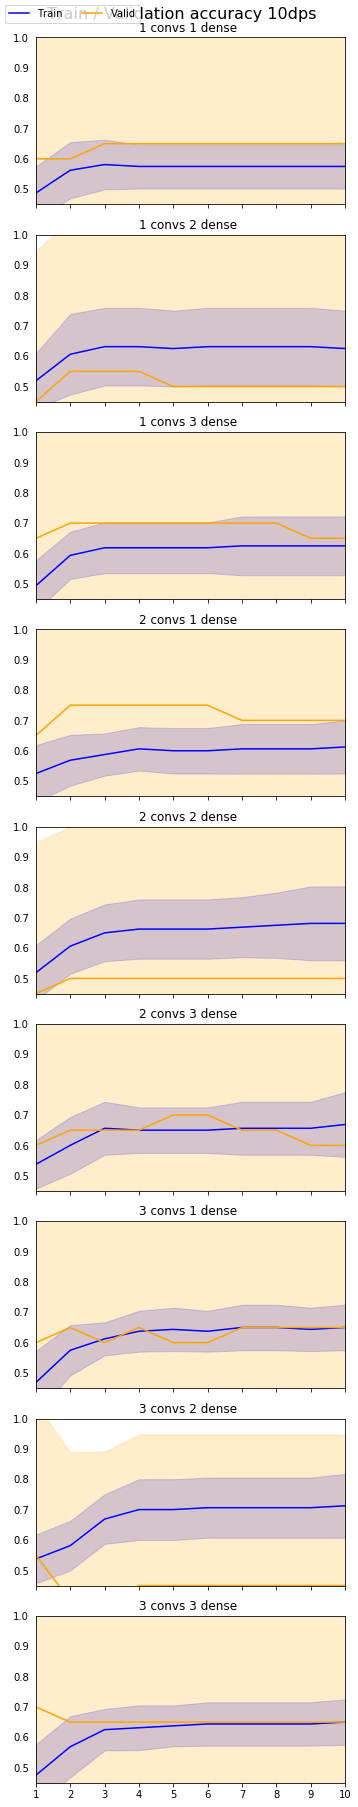

In [0]:
columns = 1
rows = 9
fig, axes = plt.subplots(rows, columns, figsize=(5, 25), sharex=True, sharey=True)
i = 0

for d_num, h in h_m.items():
  if int(d_num) != 10:
    continue
  if int(d_num) > 10:
    break
  # iterate over number of convolution layers
  for c_num, cc in h.items():
    # iterate over number of dense layers
    for l_num, ll in cc.items():
      tit = str(c_num) + ' convs ' + str(l_num) + ' dense '
      a = axes.ravel()[i]
      a.set_title(tit)
      a.plot(range(1, 11), ll['acc'], color='blue', label='Train')
      a.fill_between(range(1, 11), ll['acc'] - h_s[d_num][c_num][l_num]['acc'], ll['acc'] + h_s[d_num][c_num][l_num]['acc'], color='blue', alpha=0.2)
      
      a.plot(range(1, 11), ll['val_acc'], color='orange', label='Valid')
      a.fill_between(range(1, 11), ll['val_acc'] - h_s[d_num][c_num][l_num]['val_acc'], ll['val_acc'] + h_s[d_num][c_num][l_num]['val_acc'], color='orange', alpha=0.2)
      a.yaxis.set_ticks_position('none')
      a.axis([1, 10, 0.45, 1.0])
      i += 1

fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Train / Validation accuracy 10dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.show()

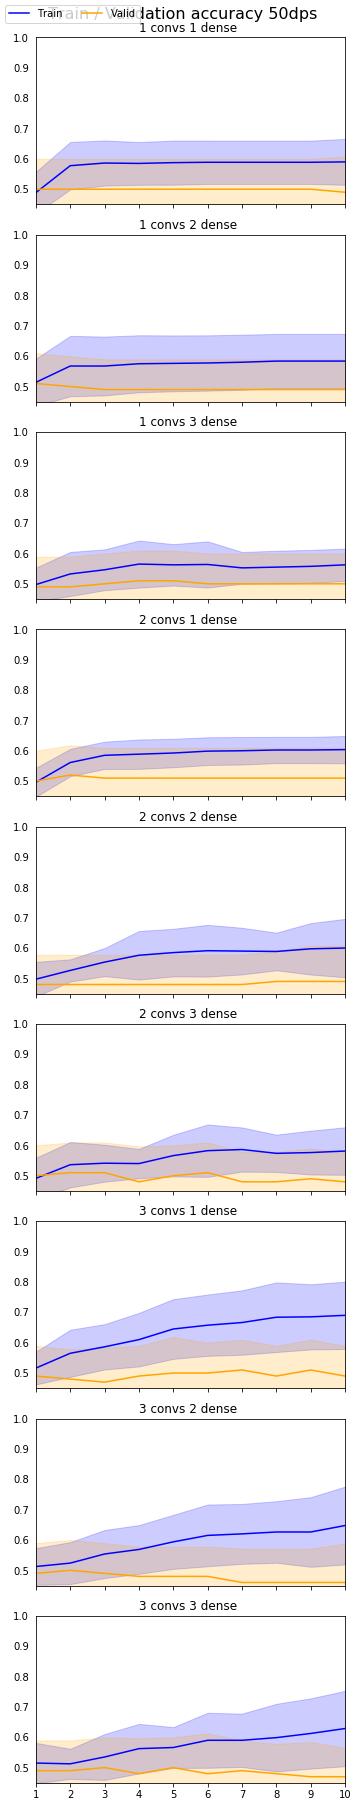

In [0]:
columns = 1
rows = 9
fig, axes = plt.subplots(rows, columns, figsize=(5, 25), sharex=True, sharey=True)
i = 0

for d_num, h in h_m.items():
  if int(d_num) != 50:
    continue
  if int(d_num) > 50:
    break
  # iterate over number of convolution layers
  for c_num, cc in h.items():
    # iterate over number of dense layers
    for l_num, ll in cc.items():
      tit = str(c_num) + ' convs ' + str(l_num) + ' dense '
      a = axes.ravel()[i]
      a.set_title(tit)
      a.plot(range(1, 11), ll['acc'], color='blue', label='Train')
      a.fill_between(range(1, 11), ll['acc'] - h_s[d_num][c_num][l_num]['acc'], ll['acc'] + h_s[d_num][c_num][l_num]['acc'], color='blue', alpha=0.2)
      
      a.plot(range(1, 11), ll['val_acc'], color='orange', label='Valid')
      a.fill_between(range(1, 11), ll['val_acc'] - h_s[d_num][c_num][l_num]['val_acc'], ll['val_acc'] + h_s[d_num][c_num][l_num]['val_acc'], color='orange', alpha=0.2)
      a.yaxis.set_ticks_position('none')
      a.axis([1, 10, 0.45, 1.0])
      i += 1

fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Train / Validation accuracy 50dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.show()

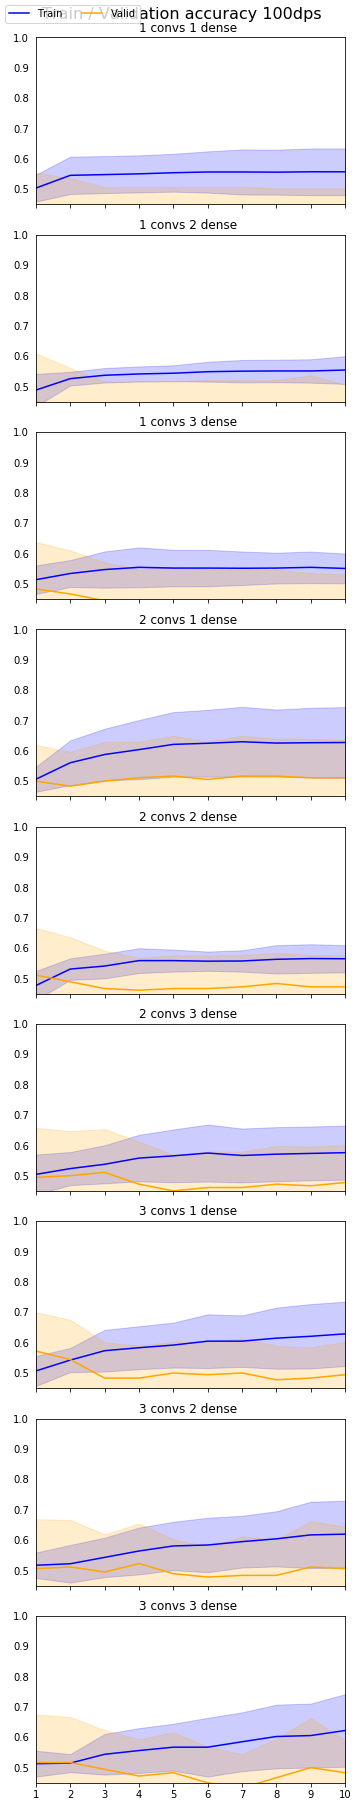

In [0]:
columns = 1
rows = 9
fig, axes = plt.subplots(rows, columns, figsize=(5, 25), sharex=True, sharey=True)
i = 0

for d_num, h in h_m.items():
  if int(d_num) != 100:
    continue
  if int(d_num) > 100:
    break
  # iterate over number of convolution layers
  for c_num, cc in h.items():
    # iterate over number of dense layers
    for l_num, ll in cc.items():
      tit = str(c_num) + ' convs ' + str(l_num) + ' dense '
      a = axes.ravel()[i]
      a.set_title(tit)
      a.plot(range(1, 11), ll['acc'], color='blue', label='Train')
      a.fill_between(range(1, 11), ll['acc'] - h_s[d_num][c_num][l_num]['acc'], ll['acc'] + h_s[d_num][c_num][l_num]['acc'], color='blue', alpha=0.2)
      
      a.plot(range(1, 11), ll['val_acc'], color='orange', label='Valid')
      a.fill_between(range(1, 11), ll['val_acc'] - h_s[d_num][c_num][l_num]['val_acc'], ll['val_acc'] + h_s[d_num][c_num][l_num]['val_acc'], color='orange', alpha=0.2)
      a.yaxis.set_ticks_position('none')
      a.axis([1, 10, 0.45, 1.0])
      i += 1

fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Train / Validation accuracy 100dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.show()

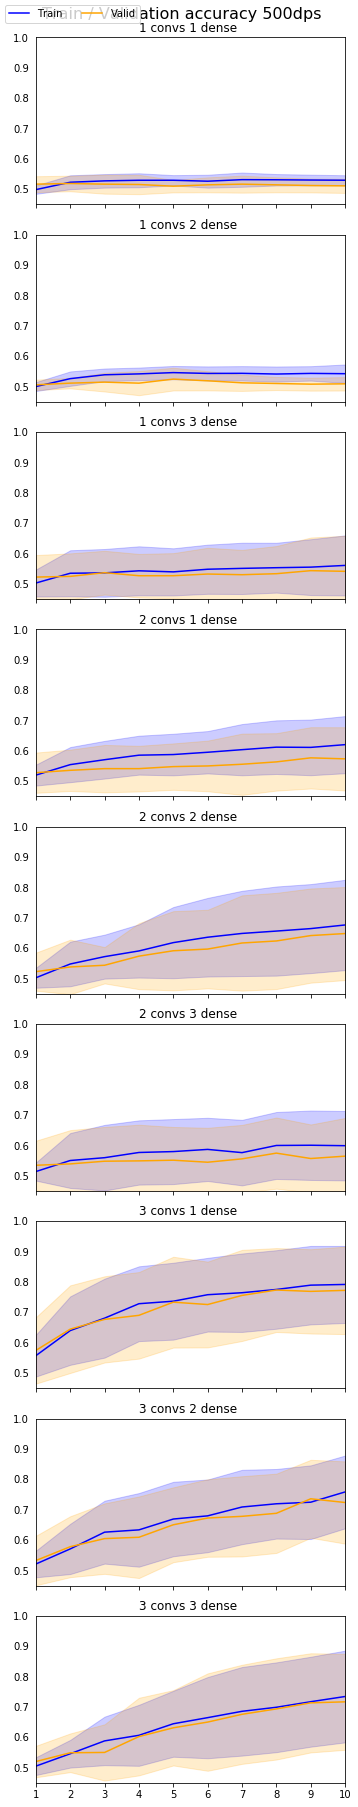

In [0]:
columns = 1
rows = 9
fig, axes = plt.subplots(rows, columns, figsize=(5, 25), sharex=True, sharey=True)
i = 0

for d_num, h in h_m.items():
  if int(d_num) != 500:
    continue
  if int(d_num) > 500:
    break
  # iterate over number of convolution layers
  for c_num, cc in h.items():
    # iterate over number of dense layers
    for l_num, ll in cc.items():
      tit = str(c_num) + ' convs ' + str(l_num) + ' dense '
      a = axes.ravel()[i]
      a.set_title(tit)
      a.plot(range(1, 11), ll['acc'], color='blue', label='Train')
      a.fill_between(range(1, 11), ll['acc'] - h_s[d_num][c_num][l_num]['acc'], ll['acc'] + h_s[d_num][c_num][l_num]['acc'], color='blue', alpha=0.2)
      
      a.plot(range(1, 11), ll['val_acc'], color='orange', label='Valid')
      a.fill_between(range(1, 11), ll['val_acc'] - h_s[d_num][c_num][l_num]['val_acc'], ll['val_acc'] + h_s[d_num][c_num][l_num]['val_acc'], color='orange', alpha=0.2)
      a.yaxis.set_ticks_position('none')
      a.axis([1, 10, 0.45, 1.0])
      i += 1

fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Train / Validation accuracy 500dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.show()

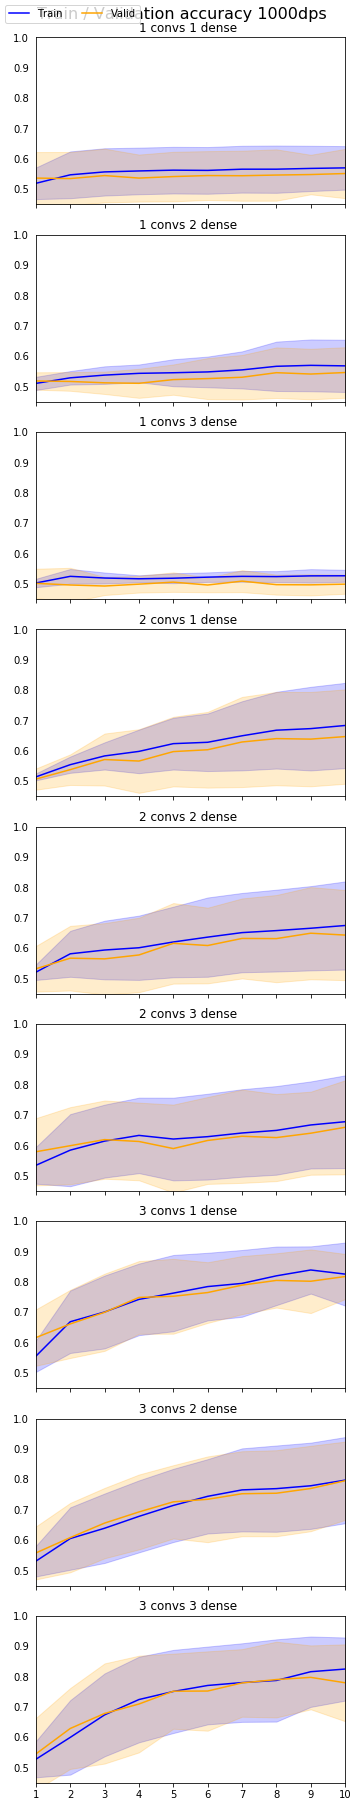

In [0]:
columns = 1
rows = 9
fig, axes = plt.subplots(rows, columns, figsize=(5, 25), sharex=True, sharey=True)
i = 0

for d_num, h in h_m.items():
  if int(d_num) != 1000:
    continue
  if int(d_num) > 1000:
    break
  # iterate over number of convolution layers
  for c_num, cc in h.items():
    # iterate over number of dense layers
    for l_num, ll in cc.items():
      tit = str(c_num) + ' convs ' + str(l_num) + ' dense '
      a = axes.ravel()[i]
      a.set_title(tit)
      a.plot(range(1, 11), ll['acc'], color='blue', label='Train')
      a.fill_between(range(1, 11), ll['acc'] - h_s[d_num][c_num][l_num]['acc'], ll['acc'] + h_s[d_num][c_num][l_num]['acc'], color='blue', alpha=0.2)
      
      a.plot(range(1, 11), ll['val_acc'], color='orange', label='Valid')
      a.fill_between(range(1, 11), ll['val_acc'] - h_s[d_num][c_num][l_num]['val_acc'], ll['val_acc'] + h_s[d_num][c_num][l_num]['val_acc'], color='orange', alpha=0.2)
      a.yaxis.set_ticks_position('none')
      a.axis([1, 10, 0.45, 1.0])
      i += 1

fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Train / Validation accuracy 1000dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.show()

### repeat small

In [0]:
f = open('./tot_hists_small_re', 'w')
json.dump(tot_hists, f)
f.close()

In [0]:
f = open('./tot_evals_small_re', 'w')
json.dump(tot_evals, f)
f.close()

In [0]:
n_hists = {}

for h in tot_hists:
  for d, hh in h.items():
    if d not in n_hists:
      n_hists[d] = {}

    for c, hhh in hh.items():
      if c not in n_hists[d]:
        n_hists[d][c] = {}
      
      for l, a in hhh.items():
        if l not in n_hists[d][c]:
          n_hists[d][c][l] = {}
        
        for st, val  in a.items(): 
          if st not in n_hists[d][c][l]:
            n_hists[d][c][l][st] = []
          n_hists[d][c][l][st].append(val)

In [0]:
h_m = {}
h_s = {}

for d, h in n_hists.items():
  if d not in h_m:
    h_m[d] = {}
  if d not in h_s:
    h_s[d] = {}
  
  for c, ds in h.items():
    if c not in h_m[d]:
      h_m[d][c] = {}
    if c not in h_s[d]:
      h_s[d][c] = {}
      
    for l, sts in ds.items():
      if l not in h_m[d][c]:
        h_m[d][c][l] = {}
      if l not in h_s[d][c]:
        h_s[d][c][l] = {}
        
      for st, val in sts.items():
        if st not in h_m[d][c][l]:
          h_m[d][c][l][st] = np.array(val).mean(0)
        if st not in h_s[d][c][l]:
          h_s[d][c][l][st] = np.array(val).std(0)

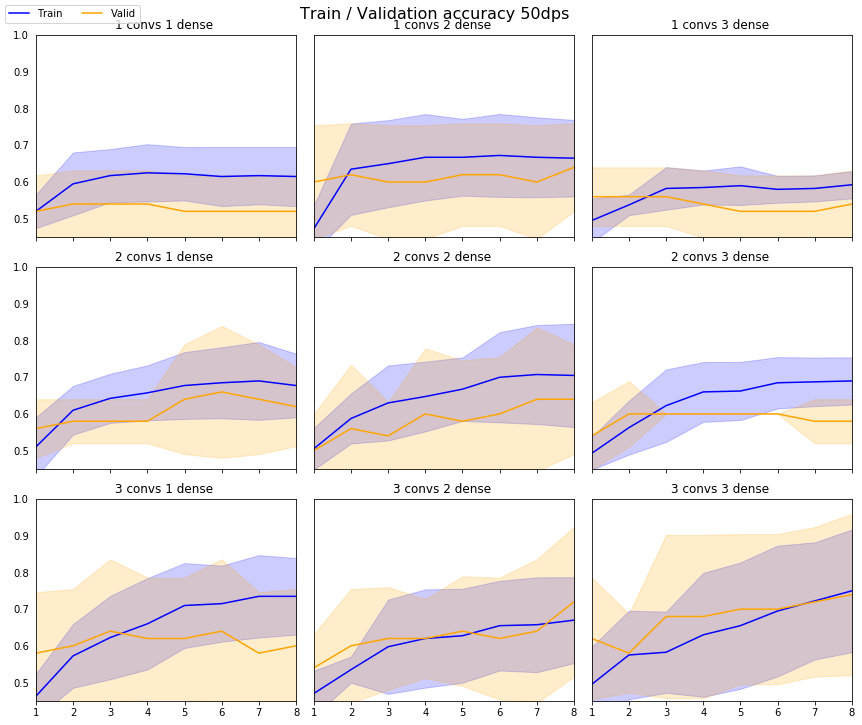

In [0]:
columns = 3
rows = 3
fig, axes = plt.subplots(rows, columns, figsize=(12, 10), sharex=True, sharey=True)
i = 0

for d_num, h in h_m.items():
  if int(d_num) != 50:
    continue
  if int(d_num) > 50:
    break
  # iterate over number of convolution layers
  for c_num, cc in h.items():
    # iterate over number of dense layers
    for l_num, ll in cc.items():
      tit = str(c_num) + ' convs ' + str(l_num) + ' dense '
      a = axes.ravel()[i]
      a.set_title(tit)
      a.plot(range(1, 9), ll['acc'], color='blue', label='Train')
      a.fill_between(range(1, 9), ll['acc'] - h_s[d_num][c_num][l_num]['acc'], ll['acc'] + h_s[d_num][c_num][l_num]['acc'], color='blue', alpha=0.2)
      
      a.plot(range(1, 9), ll['val_acc'], color='orange', label='Valid')
      a.fill_between(range(1, 9), ll['val_acc'] - h_s[d_num][c_num][l_num]['val_acc'], ll['val_acc'] + h_s[d_num][c_num][l_num]['val_acc'], color='orange', alpha=0.2)
      a.yaxis.set_ticks_position('none')
      a.axis([1, 8, 0.45, 1.0])
      i += 1

fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Train / Validation accuracy 50dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.show()

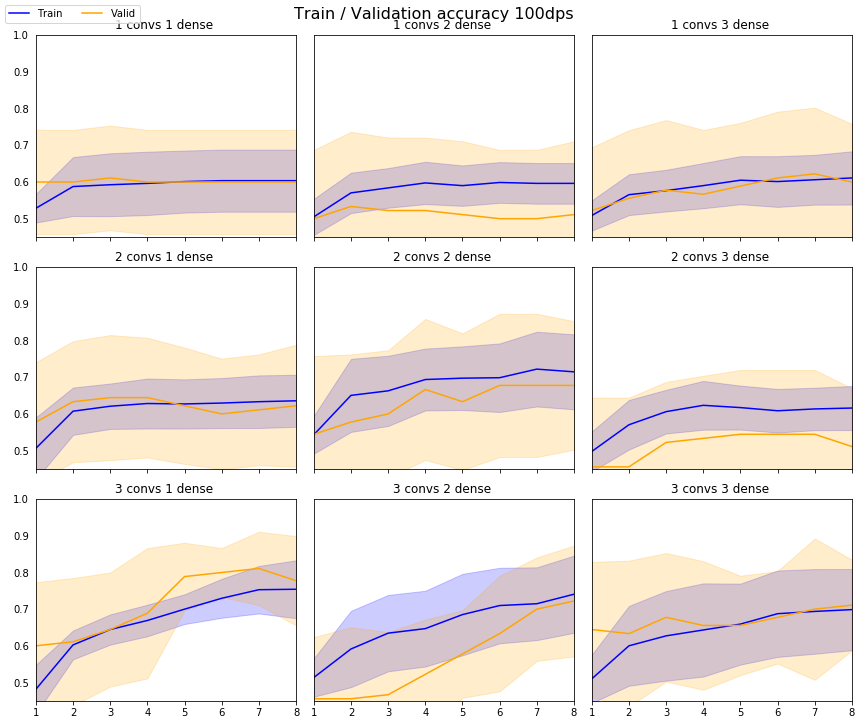

In [0]:
columns = 3
rows = 3
fig, axes = plt.subplots(rows, columns, figsize=(12, 10), sharex=True, sharey=True)
i = 0

for d_num, h in h_m.items():
  if int(d_num) != 100:
    continue
  if int(d_num) > 100:
    break
  # iterate over number of convolution layers
  for c_num, cc in h.items():
    # iterate over number of dense layers
    for l_num, ll in cc.items():
      tit = str(c_num) + ' convs ' + str(l_num) + ' dense '
      a = axes.ravel()[i]
      a.set_title(tit)
      a.plot(range(1, 9), ll['acc'], color='blue', label='Train')
      a.fill_between(range(1, 9), ll['acc'] - h_s[d_num][c_num][l_num]['acc'], ll['acc'] + h_s[d_num][c_num][l_num]['acc'], color='blue', alpha=0.2)
      
      a.plot(range(1, 9), ll['val_acc'], color='orange', label='Valid')
      a.fill_between(range(1, 9), ll['val_acc'] - h_s[d_num][c_num][l_num]['val_acc'], ll['val_acc'] + h_s[d_num][c_num][l_num]['val_acc'], color='orange', alpha=0.2)
      a.yaxis.set_ticks_position('none')
      a.axis([1, 8, 0.45, 1.0])
      i += 1

fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Train / Validation accuracy 100dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.show()

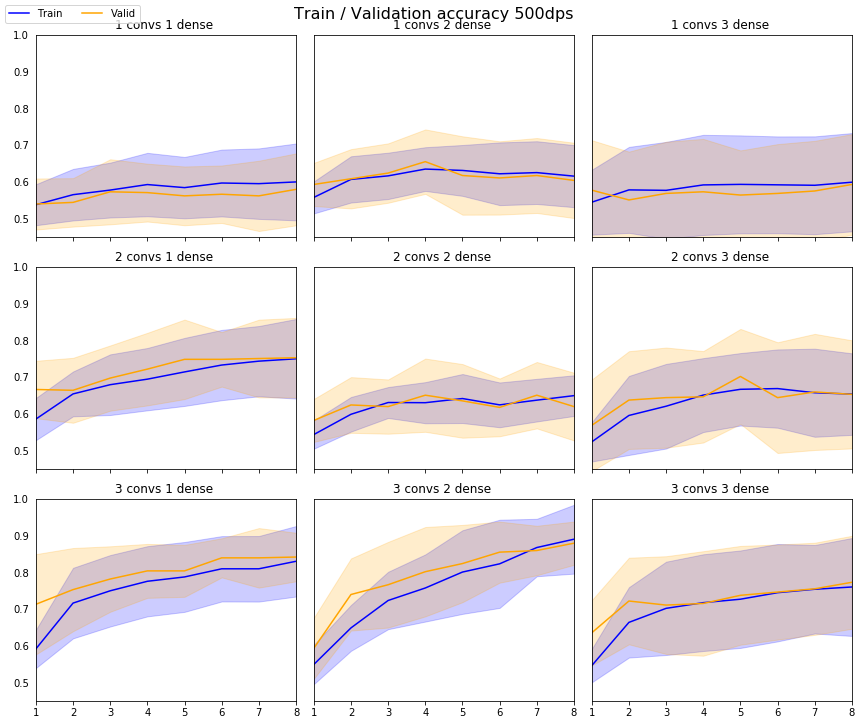

In [0]:
columns = 3
rows = 3
fig, axes = plt.subplots(rows, columns, figsize=(12, 10), sharex=True, sharey=True)
i = 0

for d_num, h in h_m.items():
  if int(d_num) != 500:
    continue
  if int(d_num) > 500:
    break
  # iterate over number of convolution layers
  for c_num, cc in h.items():
    # iterate over number of dense layers
    for l_num, ll in cc.items():
      tit = str(c_num) + ' convs ' + str(l_num) + ' dense '
      a = axes.ravel()[i]
      a.set_title(tit)
      a.plot(range(1, 9), ll['acc'], color='blue', label='Train')
      a.fill_between(range(1, 9), ll['acc'] - h_s[d_num][c_num][l_num]['acc'], ll['acc'] + h_s[d_num][c_num][l_num]['acc'], color='blue', alpha=0.2)
      
      a.plot(range(1, 9), ll['val_acc'], color='orange', label='Valid')
      a.fill_between(range(1, 9), ll['val_acc'] - h_s[d_num][c_num][l_num]['val_acc'], ll['val_acc'] + h_s[d_num][c_num][l_num]['val_acc'], color='orange', alpha=0.2)
      a.yaxis.set_ticks_position('none')
      a.axis([1, 8, 0.45, 1.0])
      i += 1

fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Train / Validation accuracy 500dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.show()

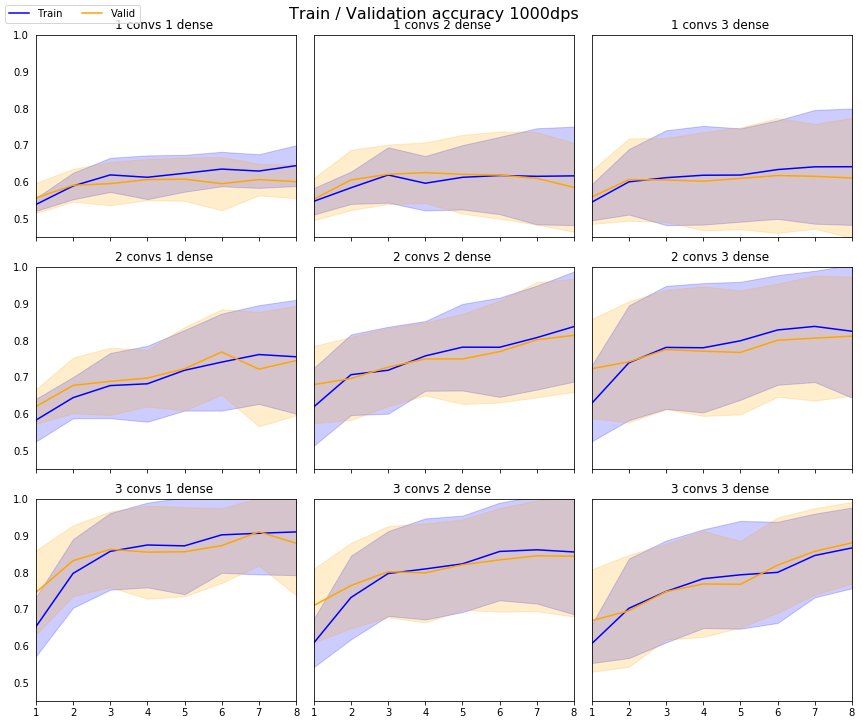

In [0]:
columns = 3
rows = 3
fig, axes = plt.subplots(rows, columns, figsize=(12, 10), sharex=True, sharey=True)
i = 0

for d_num, h in h_m.items():
  if int(d_num) != 1000:
    continue
  if int(d_num) > 1000:
    break
  # iterate over number of convolution layers
  for c_num, cc in h.items():
    # iterate over number of dense layers
    for l_num, ll in cc.items():
      tit = str(c_num) + ' convs ' + str(l_num) + ' dense '
      a = axes.ravel()[i]
      a.set_title(tit)
      a.plot(range(1, 9), ll['acc'], color='blue', label='Train')
      a.fill_between(range(1, 9), ll['acc'] - h_s[d_num][c_num][l_num]['acc'], ll['acc'] + h_s[d_num][c_num][l_num]['acc'], color='blue', alpha=0.2)
      
      a.plot(range(1, 9), ll['val_acc'], color='orange', label='Valid')
      a.fill_between(range(1, 9), ll['val_acc'] - h_s[d_num][c_num][l_num]['val_acc'], ll['val_acc'] + h_s[d_num][c_num][l_num]['val_acc'], color='orange', alpha=0.2)
      a.yaxis.set_ticks_position('none')
      a.axis([1, 8, 0.45, 1.0])
      i += 1

fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Train / Validation accuracy 1000dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.show()

In [0]:
accs = {}

for t in tot_evals:
  for num, tt in t.items():
    if num not in accs:
      accs[num] = {}
    for conv, ttt in tt.items():
      if conv not in accs[num]:
        accs[num][conv] = {}
      for ls, vals in ttt.items():
        if ls not in accs[num][conv]:
          accs[num][conv][ls] = []
        accs[num][conv][ls].append(vals['test_acc'])

In [0]:
test_ms = {}
test_st = {}

for num, t in accs.items():
  if num not in test_ms:
    test_ms[num] = {}
    test_st[num] = {}
  for conv, tt in t.items():
    if conv not in test_ms[num]:
      test_ms[num][conv] = {}
      test_st[num][conv] = {}
    for ls, vals in tt.items():
      test_ms[num][conv][ls] = np.array(vals).mean()
      test_st[num][conv][ls] = np.array(vals).std()

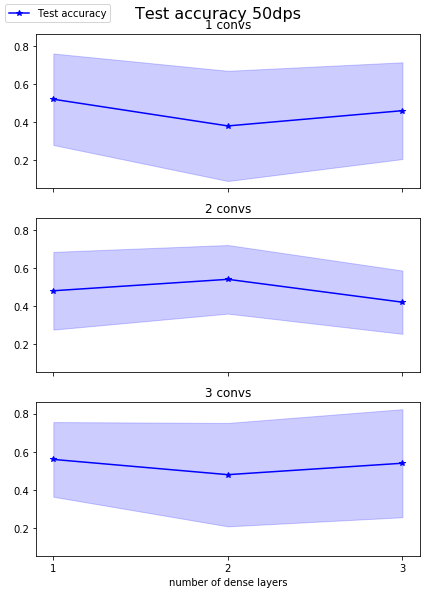

In [0]:
columns = 1
rows = 3
fig, axes = plt.subplots(rows, columns, figsize=(6,8), sharex=True, sharey=True)
i = 0

for num, t in test_ms.items():
  if int(num) != 50:
    continue
  if int(num) > 50:
    break
  for conv, tt in t.items():
    a = axes.ravel()[i]
    tit = str(conv) + ' convs'
    a.set_title(tit)
    a.plot(range(1, 4), tt.values(), '*-', color='blue', label='Test accuracy')
    a.fill_between(range(1, 4), np.array(list(tt.values())) - np.array(list(test_st[num][conv].values())), np.array(list(tt.values())) + np.array(list(test_st[num][conv].values())), color='blue', alpha=0.2)
    i += 1
fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Test accuracy 50dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.xlabel('number of dense layers')
plt.xticks(range(1,4))
plt.show()

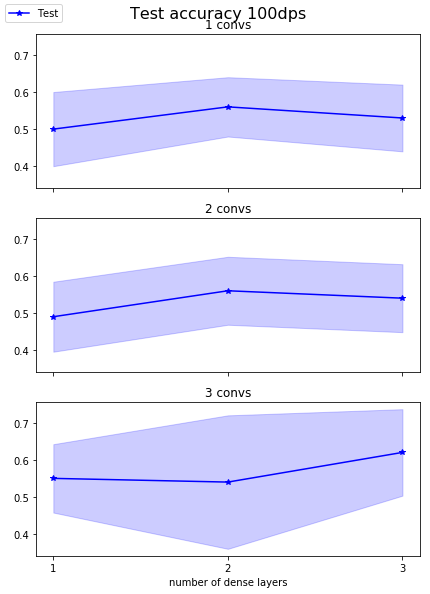

In [0]:
columns = 1
rows = 3
fig, axes = plt.subplots(rows, columns, figsize=(6,8), sharex=True, sharey=True)
i = 0

for num, t in test_ms.items():
  if int(num) != 100:
    continue
  if int(num) > 100:
    break
  for conv, tt in t.items():
    a = axes.ravel()[i]
    tit = str(conv) + ' convs'
    a.set_title(tit)
    a.plot(range(1, 4), tt.values(), '*-', color='blue', label='Test')
    a.fill_between(range(1, 4), np.array(list(tt.values())) - np.array(list(test_st[num][conv].values())), np.array(list(tt.values())) + np.array(list(test_st[num][conv].values())), color='blue', alpha=0.2)
    i += 1
fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Test accuracy 100dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.xlabel('number of dense layers')
plt.xticks(range(1,4))
plt.show()

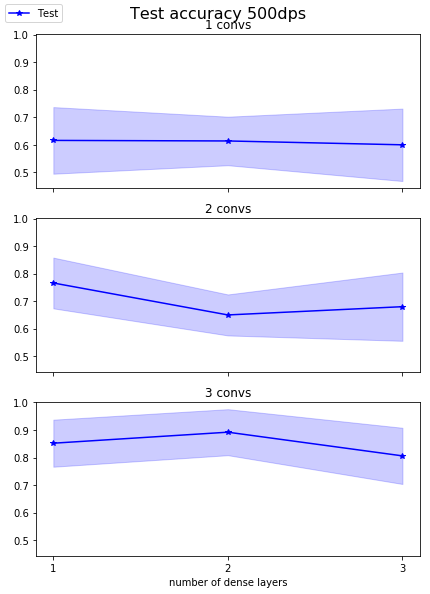

In [0]:
columns = 1
rows = 3
fig, axes = plt.subplots(rows, columns, figsize=(6,8), sharex=True, sharey=True)
i = 0

for num, t in test_ms.items():
  if int(num) != 500:
    continue
  if int(num) > 500:
    break
  for conv, tt in t.items():
    a = axes.ravel()[i]
    tit = str(conv) + ' convs'
    a.set_title(tit)
    a.plot(range(1, 4), tt.values(), '*-', color='blue', label='Test')
    a.fill_between(range(1, 4), np.array(list(tt.values())) - np.array(list(test_st[num][conv].values())), np.array(list(tt.values())) + np.array(list(test_st[num][conv].values())), color='blue', alpha=0.2)
    i += 1
fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Test accuracy 500dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.xlabel('number of dense layers')
plt.xticks(range(1,4))
plt.show()

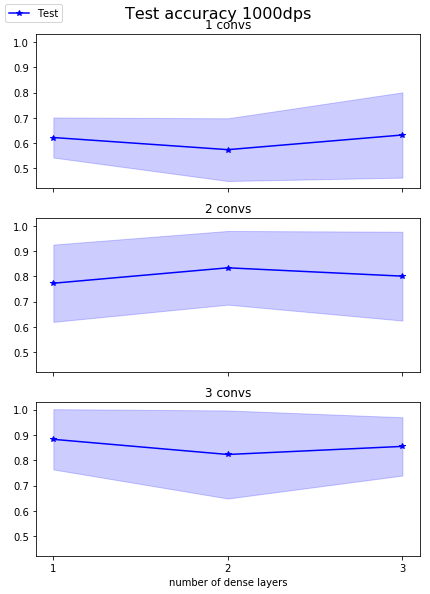

In [0]:
columns = 1
rows = 3
fig, axes = plt.subplots(rows, columns, figsize=(6,8), sharex=True, sharey=True)
i = 0

for num, t in test_ms.items():
  if int(num) != 1000:
    continue
  if int(num) > 1000:
    break
  for conv, tt in t.items():
    a = axes.ravel()[i]
    tit = str(conv) + ' convs'
    a.set_title(tit)
    a.plot(range(1, 4), tt.values(), '*-', color='blue', label='Test')
    a.fill_between(range(1, 4), np.array(list(tt.values())) - np.array(list(test_st[num][conv].values())), np.array(list(tt.values())) + np.array(list(test_st[num][conv].values())), color='blue', alpha=0.2)
    i += 1
fig.legend(a.get_legend_handles_labels()[1], loc='upper left', ncol=2)
plt.suptitle('Test accuracy 1000dps', x=0.5,y=1.002, fontsize=16)
plt.tight_layout()
plt.xlabel('number of dense layers')
plt.xticks(range(1,4))
plt.show()